TP 1 : Introduction à Scikit-Learn
=======

1 - Introduction 
------


L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.

- Python 3: https://docs.python.org/3/
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/
- Matplotilb: https://matplotlib.org/contents.html
- Scikit-learn: http://scikit-learn.org

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

2 - La base d'apprentissage 
-----

Nous allons utiliser dans ce TP, la base `Iris` (vous trouverez des informations complémentaires sur cette base à l'adresse http://archive.ics.uci.edu/ml/datasets/Iris ). C'est une base comportant trois types d'Iris (Iris Setosa, Iris Versicolour et l'Iris Virginica). Chacune des fleurs est d'écrites par 4 attributs (la longueur et la largeur du sépale et du pétale). L'objectif est d'utiliser les différentes méthodes d'apprentissage vu en cours pour distinguer les trois types d'Iris.

Commencez par charger la base de donnée à l'aide du code suivant :

In [3]:
data  = load_iris()
features = data['data'] # Descripteurs de chaque fleurs 
features_names = data['feature_names'] # nom de chaque attribut 
y = data['target'] # type de chaque fleurs
y_names = data['target_names'] # nom de chaque type de fleurs

Afficher le descripteur de la cinquième fleurs de la base.

In [4]:
print ("Descripteur de la fleurs 5 : " + str(features[5]))

Descripteur de la fleurs 5 : [5.4 3.9 1.7 0.4]


Afficher le numéro du type de la cinquième fleur.

In [5]:
print("Type de la fleurs 5 : " + str(y_names[y[5]]))

Type de la fleurs 5 : setosa


Donnez les dimensions du sépal et du pétale de la fleurs cinquième ainsi que le nom de son type.

In [6]:
for i in range(len(features_names)):
    print(str(features_names[i]) + " : " + str(features[5][i]))

sepal length (cm) : 5.4
sepal width (cm) : 3.9
petal length (cm) : 1.7
petal width (cm) : 0.4


Dans un premier temps nous travaillerons uniquement avec les deux premières dimensions décrivant nos images (la longueur et la largeur du sépale). Définissez `X` contenant le descripteur de chaque fleurs uniquement à partir des deux premières dimensions de `features`.

In [7]:
X = features[:,:2]
X.shape

(150, 2)

Afficher à l'écran les points de la base d'apprentissage en fonction uniquement de ces deux dimensions. Vous pouvez utiliser le code suivant:

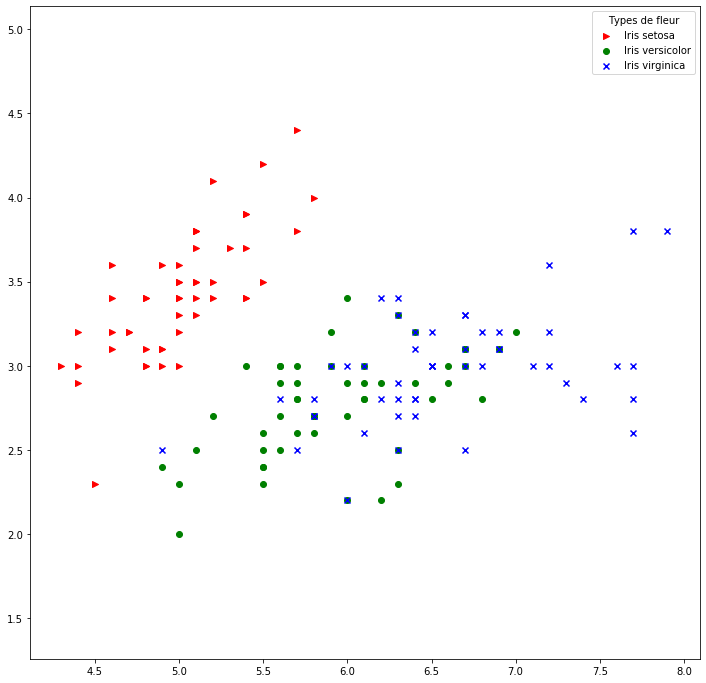

In [8]:
plt.figure(figsize=(12,12))
for t,marker,c,txt in zip(np.arange(3),">ox","rgb",y_names):
    plt.scatter(X[y == t,0],
                X[y == t,1],
                marker=marker,c=c,label='Iris '+txt)
plt.legend(title='Types de fleur')
plt.axis('equal')
plt.show()

Que remarquez-vous sur la disposition des points de cette base ?

3 - Les k-plus-proche-voisins (kNN)
--- 

Nous allons commencer par classer notre base à l'aide de la méthode kNN. 

Réalisez l'apprentissage d'un kNN avec 5 voisins. Pour cela, vous devez utiliser la fonction `KNeighborsClassifier` de sckit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html ).

In [8]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                     weights='uniform')

Affichez ensuite le résultat du classifieur en découpant l'espace en trois parties correspondants à chacune des classes en utilisant le code suivant : 

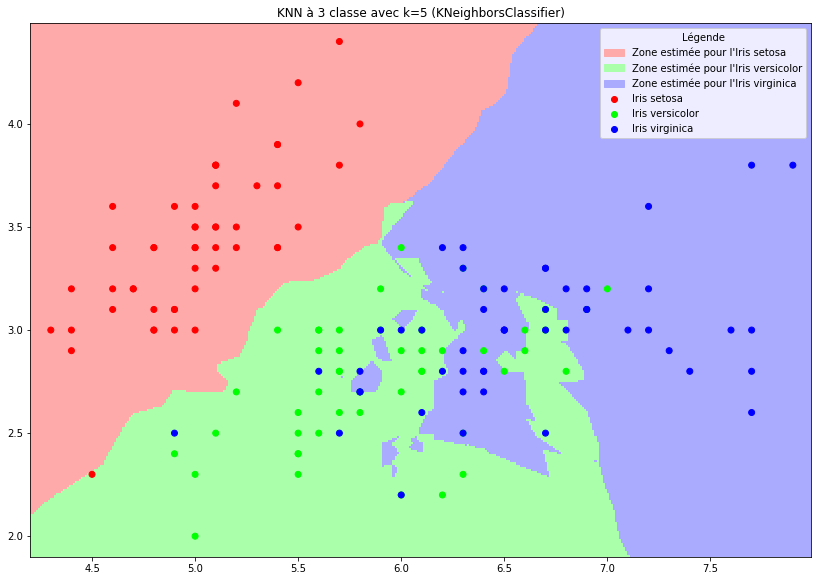

In [9]:
cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X,y,clf,'KNN à 3 classe avec k=5 (KNeighborsClassifier)')

Le classifieur kNN de `scikit-learn` admet plusieurs paramètres notamment le nombre de voisin et le type de pondération de ces derniers. La pondération uniforme que vous venez d'utiliser permet de donner la même importance à chaque voisin dans le vote de la classe de l'exemple. Vous pouvez changer ce poids en donnant plus d'importance aux exemples les plus proches du point à tester et moins d'importance aux exemples plus éloigné. Pour cela changer l'option `weights='uniform'` par `weights='distance'`.

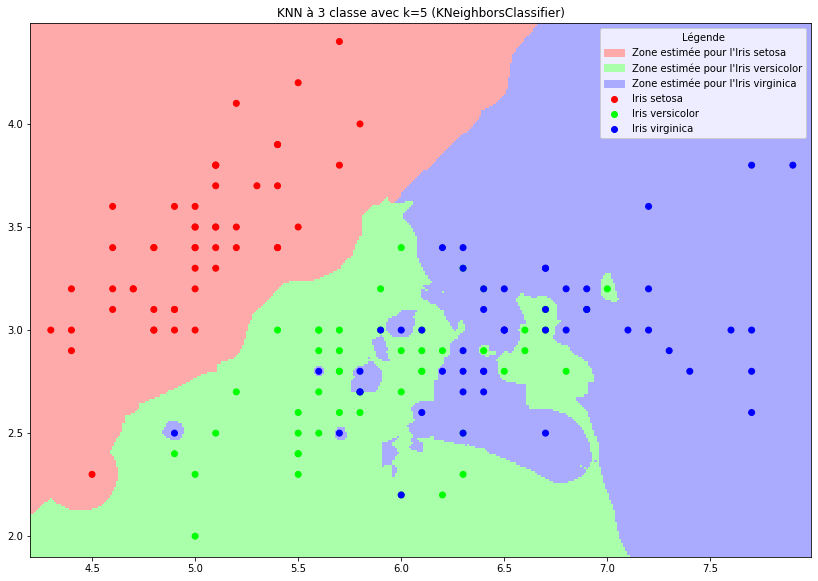

In [10]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')
clf.fit(X, y)

cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X,y,clf,'KNN à 3 classe avec k=5 (KNeighborsClassifier)')

4 - Classifieur bayésien
--- 

Nous allons changer de type de classifieur. Réaliser les même opération que précédemment avec un classifieur bayésien à une gaussienne. Utilisez pour cela la classe `GaussianNB` de scikit-learn avec les paramètres par défaut (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html ). 

In [11]:
clf = GaussianNB(priors=None)
clf.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

Faites en sorte d'obtenir un affichage similaire à la partie précédente.

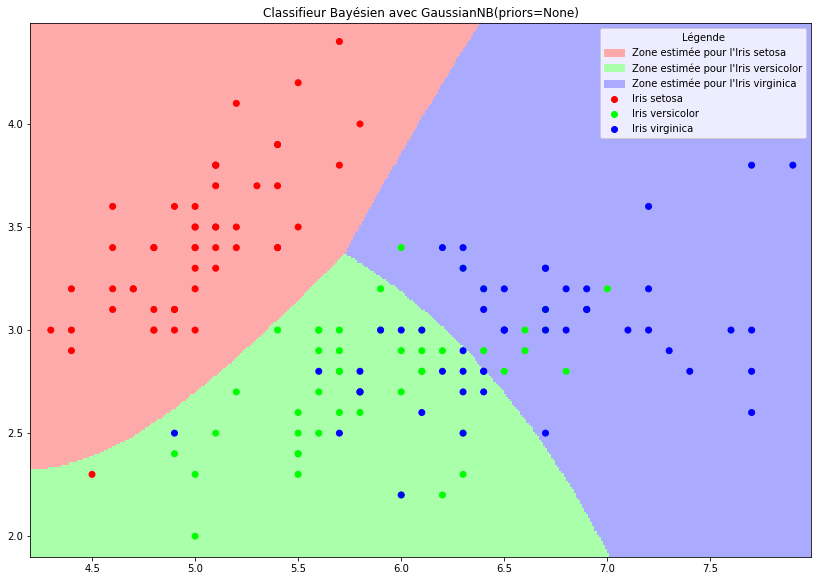

In [12]:
cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X,y,clf,'Classifieur Bayésien avec GaussianNB(priors=None)')

5 - Classifieur SVM
------

Nous allons dans cette partie tester plusieurs version et paramètres de SVM. 

Commencez par tester l'implémentation par défaut d'un SVM. Pour cela utilisez la fonction `svm.SVC` de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html ).

In [13]:
clf = svm.SVC(C=1.0, kernel="linear", max_iter=10000 )
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=10000, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

En utilisant la documentation testez des SVM avec les paramètres suivants:
- Noyau: linéaire, C=1.0,
- Noyau: RBF, C=1.0, $\gamma = 0.7$,
- Noyau: Polynomial, C=1.0, degrée: 3

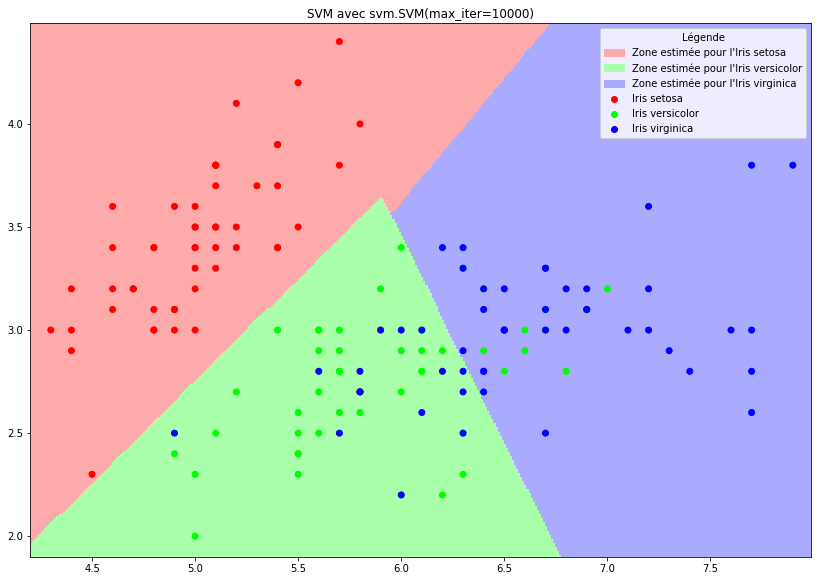

In [14]:
cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X,y,clf,'SVM avec svm.SVM(max_iter=10000)')

La librairie scikit-learn propose deux implémentations pour les SVM linéaires. Nous venons de voir dans la question précédente la solution à l'aide de la fonction `svm.SVC`. Testez la méthode alternative `svm.LinearSVC` (https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html ). Cette fonction n'est disponible que pour des SVM linéaires et peut donner des résultats légérement différents de la précédentes.

In [15]:
clf = svm.LinearSVC(C=1.0, max_iter=10000)
clf.fit(X,y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Changez les paramètres des noyaux et regardez comment est modifié la séparation des classes.

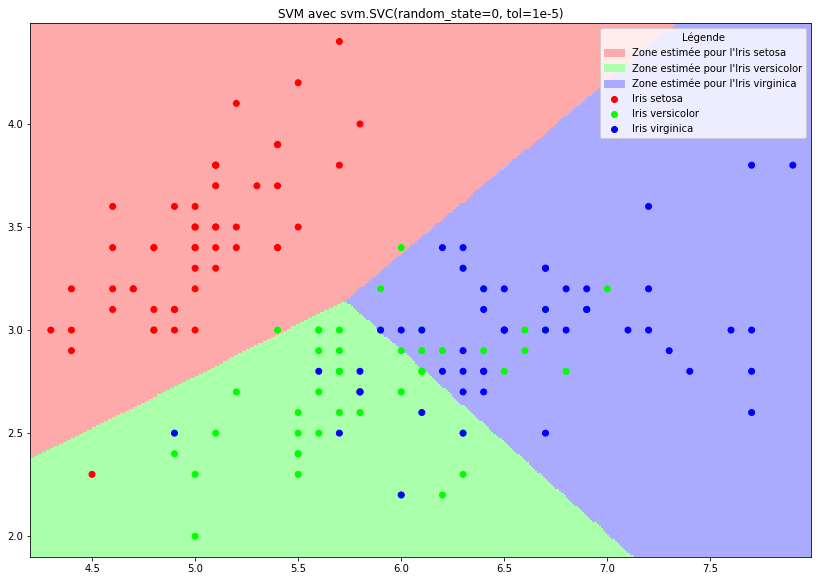

In [16]:
cmap_light = ['#FFAAAA', '#AAFFAA', '#AAAAFF']
cmap_bold = ['#FF0000', '#00FF00', '#0000FF']
h = .01  # step size in the mesh

def plot_classifieur(X,y,clf,title):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(14,14))
    plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(cmap_light))

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(cmap_bold))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.axis('scaled')

    color_patch = ['',]*6

    for i in range(3):
        color_patch[i] = mpatches.Patch(color=cmap_light[i], label='Zone estimée pour l\'Iris '+y_names[i])

    for i in range(3):
        color_patch[i+3] = plt.scatter([],[],color=cmap_bold[i], label='Iris '+y_names[i])

    plt.legend(handles=color_patch,title='Légende')

    plt.show()

plot_classifieur(X,y,clf,'SVM avec svm.SVC(random_state=0, tol=1e-5)')

6 - Implémentation
------

Vous pouvez testez les performances d'une méthode de classification avec le code suivant:

In [77]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y) 
y_pred = clf.predict(X)

print("Proportion de point correctement classé avec un KNN à 5 voisins: %f" % np.mean(y == y_pred)) 

Proportion de point correctement classé avec un KNN à 5 voisins: 0.833333


Affichez les scores des différentes solution vue dans ce TP:

In [87]:
clf = GaussianNB(priors=None)
clf.fit(X, y)
y_pred = clf.predict(X)
print("Score(Gaussian) : %f" % np.mean(y == y_pred)) 

clf = svm.SVC(max_iter=10000)
clf.fit(X,y)
y_pred = clf.predict(X)
print("Score(SVC par défault) : %f" % np.mean(y == y_pred))


clf = svm.SVC(C=1.0, kernel="linear", max_iter=10000 )
clf.fit(X,y)
y_pred = clf.predict(X)
print("Score(SVC RBF) : %f" % np.mean(y == y_pred))

clf = svm.SVC(C=1.0, kernel="poly", max_iter=10000 )
clf.fit(X,y)
y_pred = clf.predict(X)
print("Score(SVC polynomial) : %f" % np.mean(y == y_pred))


clf = svm.LinearSVC(random_state=0, tol=1e-5)
clf.fit(X,y)
y_pred = clf.predict(X)
print("Score(svm.LinearSVC) : %f" % np.mean(y == y_pred)) 


Score(Gaussian) : 0.780000
Score(SVC par défault) : 0.820000
Score(SVC RBF) : 0.820000
Score(SVC polynomial) : 0.813333
Score(svm.LinearSVC) : 0.800000


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Récrivez le code de l'algorithme knn et vérifiez que votre implémentation donne des résultats similaires à celle de scikit-learn. Votre solution ne doit pas utiliser de boucles `for, while` ou de `if` et ne doit pas faire plus de 5 lignes.

In [97]:
import scipy
k = 10

matrixDistance= scipy.spatial.distance.cdist(X, X, metric="euclidean")
voisins = matrixDistance.argsort(axis=1)[:, 1:k+1]
kPlusProcheVoisins = y[voisins]
y_pred_TP = mode(np.take(X,voisins),axis=0)[0]

clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y)
y_pred_sklearn = clf.predict(X)
print('Performance avec le sujet de TP:',np.mean((y_pred_TP-y)==0))
print('Performance avec scikit-learn:',np.mean((y_pred_sklearn-y)==0))

NameError: name 'mode' is not defined

array([[ 17,  40,  43,  39,  27],
       [ 25,  34,   9,  45,  12],
       [  2,  47,  30,   3,  24],
       [ 47,  29,   2,  30,  42],
       [ 37,  43,  40,  21,  17],
       [ 16,  10,  48,  32,  18],
       [ 47,  22,  11,  24,  29],
       [  7,  39,  49,  43,  40],
       [ 38,  13,   3,  42,  47],
       [  9,   1,  30,  25,  35],
       [ 48,   5,  16,  36,  27],
       [ 11,  26,   7,   6,  29],
       [ 45,  30,   1,  34,   9],
       [ 38,   8,  42,   3,  47],
       [ 18,  33,  16,   5,  15],
       [ 33,  14,  16,   5,  32],
       [ 16,  10,  48,  32,  18],
       [ 17,  40,  43,  39,  27],
       [ 14,  10,  16,   5,  36],
       [ 46,  44,  21,   4,  48],
       [ 31,  36,  28,  27,  10],
       [ 44,  19,  46,   4,   0],
       [  6,  24,  11,  37,  47],
       [ 49,  39,  35,  26,   7],
       [ 11,  26,   7,   6,  29],
       [  1,  34,   9,  35,  45],
       [  7,  39,  49,  43,  40],
       [ 28,  17,   0,  39,  40],
       [ 27,  39,  23,  17,   0],
       [  2,  